In [1]:
%matplotlib inline

import sys
sys.path.append("..") # This allows for importing from other directories above
# Our imports
from models.adaboost_mh import AdaBoostMH
from models.weak_learner import stump_base as weak_clf
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt


# Load the data
switch = 0
if switch == 0:
    X_train = np.load('../data/pendigits/train_data.npy')
    y_train = np.load('../data/pendigits/train_labels.npy')
    X_test = np.load('../data/pendigits/test_data.npy')
    y_test = np.load('../data/pendigits/test_labels.npy')
    k = 10
elif switch == 1:
    X_train = np.load('../data/synth/ten/train_data.npy')
    y_train = np.load('../data/synth/ten/train_labels.npy')
    X_test = np.load('../data/synth/ten/test_data.npy')
    y_test = np.load('../data/synth/ten/test_labels.npy')
    k = 10
elif switch == 2:
    X_train = np.load('../data/synth/two/train_data.npy')
    y_train = np.load('../data/synth/two/train_labels.npy')
    X_test = np.load('../data/synth/two/test_data.npy')
    y_test = np.load('../data/synth/two/test_labels.npy')
    k = 2
elif switch == 3:
    X_train = np.load('../data/synth/three/train_data.npy')
    y_train = np.load('../data/synth/three/train_labels.npy')
    X_test = np.load('../data/synth/three/test_data.npy')
    y_test = np.load('../data/synth/three/test_labels.npy')
    k = 3
elif switch == 4:
    X_train = np.load('../data/synth/four/train_data.npy')
    y_train = np.load('../data/synth/four/train_labels.npy')
    X_test = np.load('../data/synth/four/test_data.npy')
    y_test = np.load('../data/synth/four/test_labels.npy')
    k = 4
else:
    X_train = np.load('../data/synth/half/train_data.npy')
    y_train = np.load('../data/synth/half/train_labels.npy')
    X_test = np.load('../data/synth/half/test_data.npy')
    y_test = np.load('../data/synth/half/test_labels.npy')
    k = 2
    
#y_train = y_train[0:100]
#X_train = X_train[0:100]
    
# Initialize model 
model = AdaBoostMH(X_train, y_train, X_test, y_test, k, 0.8)

In [2]:
#X_train = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
#X_train = np.atleast_2d(X_train).T
#y_train = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
#X_test = X_train
#y_test = y_train
#k = 20
#model = AdaBoostMH(X_train, y_train, X_test, y_test, 0.8)

In [3]:
y_train

array([[-1., -1., -1., ..., -1.,  1., -1.],
       [-1., -1.,  1., ..., -1., -1., -1.],
       [-1.,  1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1.,  1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ...,  1., -1., -1.]])

In [4]:
X_train

array([[ 47., 100.,  27., ...,  90.,  40.,  98.],
       [  0.,  89.,  27., ...,   2., 100.,   6.],
       [  0.,  57.,  31., ...,  25.,  16.,   0.],
       ...,
       [100.,  98.,  60., ...,   0.,   0.,   5.],
       [ 59.,  65.,  91., ...,   1., 100.,   0.],
       [  0.,  78.,  29., ...,  36., 100.,  40.]])

In [5]:
T = 100
verbose = 2

In [6]:
err_tr, err_te, gams, v_ts, d_ts = model.run_factorized(T, weak_clf, 'bal', verbose)

Round 1
alpha is 0.47009559077720814
Edge is 0.43827654716365455
Energy is 0.898840179457006
v is [ 1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
b is 13.5
 col is 15
Round 2
alpha is 0.3338082885153955
Edge is 0.3219385313348715
Energy is 0.9467605727119979
v is [-1.  1.  1.  1. -1.  1. -1.  1.  1. -1.]
b is 45.5
 col is 4
Round 3
alpha is 0.30861381859554143
Edge is 0.29917551127957936
Energy is 0.9541980996892606
v is [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
b is 3.5
 col is 1
Round 4
alpha is 0.34791483181045
Edge is 0.3345250145350648
Energy is 0.9423868710090949
v is [-1.  1.  1. -1.  1. -1. -1.  1.  1. -1.]
b is 29.5
 col is 14
Round 5
alpha is 0.3486789362198916
Edge is 0.3352034367786327
Energy is 0.9421457721455819
v is [ 1.  1. -1. -1.  1.  1. -1. -1.  1.  1.]
b is 32.5
 col is 11
Round 6
alpha is 0.25652842824889827
Edge is 0.251045598287607
Energy is 0.967975261863864
v is [-1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
b is 84.5
 col is 1
Round 7
alpha is 0.2575366861846215
Edge is 

alpha is 0.13417991741393934
Edge is 0.13338040516481842
Energy is 0.9910649158950532
v is [ 1. -1. -1.  1.  1. -1. -1. -1. -1. -1.]
b is 50.5
 col is 8
Round 53
alpha is 0.14236280847592434
Edge is 0.14140877821643758
Energy is 0.9899512904397542
v is [-1. -1.  1. -1. -1. -1. -1.  1. -1. -1.]
b is 9.5
 col is 14
Round 54
alpha is 0.15487031677849988
Edge is 0.15364390292653968
Energy is 0.9881262829686801
v is [-1.  1. -1. -1. -1. -1. -1. -1.  1.  1.]
b is 9.5
 col is 6
Round 55
alpha is 0.14582365954908616
Edge is 0.14479875201018755
Energy is 0.9894611267838128
v is [-1. -1.  1.  1. -1. -1. -1. -1.  1. -1.]
b is 62.5
 col is 4
Round 56
alpha is 0.1446432861546456
Edge is 0.14364293011296908
Energy is 0.9896295815246028
v is [ 1. -1.  1.  1.  1. -1. -1. -1.  1.  1.]
b is 55.5
 col is 12
Round 57
alpha is 0.153323046092482
Edge is 0.1521327997802021
Energy is 0.988360061531746
v is [ 1. -1.  1.  1. -1. -1. -1.  1.  1. -1.]
b is 87.5
 col is 3
Round 58
alpha is 0.15406405628745065
Edge

## Plot Pseudo Weights

In [7]:
def calc_pseudo_ws(Wts, vts, Y, T):
    w_pseudo_ts = []
    for t in range(T):
        #W_t = Wts[t + 1] # skip W_0
        W_t = Wts[t]
        v_t = vts[t] 
        # Get all the y_i,l * v_l in one matrix
        Y_mult_v_t = np.multiply(Y, v_t)
        # The above is either 1 or -1, to get an indicator
        # about whether their product is +1 or -1 you can 
        # add one to the whole matrix and all the -1 -> 0,
        # or add negative one to the whole matrix and all
        # the +1 -> 0. You just need to normalize by \pm 1/2,
        # to get an indicator or a matrix mask.
        w_p_mask = ((Y_mult_v_t + 1) * 0.5).astype('int')
        w_n_mask = ((Y_mult_v_t - 1) * -0.5).astype('int')
        w_p_t = np.sum(np.multiply(W_t, w_p_mask), axis=1)
        w_n_t = np.sum(np.multiply(W_t, w_n_mask), axis=1)
        w_pseudo_t = np.sum(np.abs(w_p_t - w_n_t))
        w_pseudo_ts.append(w_pseudo_t)
    return w_pseudo_ts

In [8]:
pseudo_W_ts = calc_pseudo_ws(d_ts, v_ts, y_train, T)

In [9]:
# Function for plotting Pseudo weights on same plot for two datasets
def make_plot(data_to_plot, T, ylabel, xlabel, title):
    ts = np.linspace(1, T, num=T)
    plt.plot(ts, data_to_plot) #, label='Pseudo Weights')
    #plt.legend(loc='best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

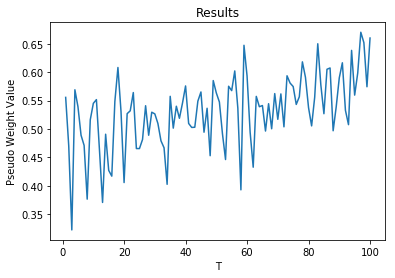

In [10]:
make_plot(pseudo_W_ts, T, "Pseudo Weight Value", "T", "Results")

In [11]:
np.min(pseudo_W_ts)

0.3220656323482308

In [12]:
pseudo_W_ts[0]

0.5555555555555556

## Plot Gammas

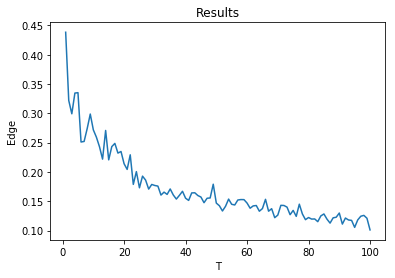

In [13]:
make_plot(gams, T, "Edge", "T", "Results")

In [14]:
np.min(gams)

0.10108846567996521